In [1]:
import random
import numpy as np
import scipy as sp

from IPython.display import Image
import matplotlib.pyplot as plt


from scipy  import stats


### Using KDE on simulated data 



* This example explores the KDE on data generated from a Gaussian with the following parameters:
  * $X \sim \mathcal{N}(0, 0.5)$

1. Generate 100 points from the distribution above,
2. Build a histogram for the data
3. Compare the KDE generated plot to the histogram


In [7]:
x_mean, x_scale =  0, 0.5
x = np.random.normal(x_mean, x_scale, 100)

counts  = np.histogram(x, bins=np.arange(-3,3, 0.2))
counts



(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  8, 10, 15, 13, 17, 15,
         8,  5,  1,  1,  2,  1,  0,  0,  0,  0,  0,  0]),
 array([-3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
        -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
        -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
        -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,  2.66453526e-15,
         2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
         1.00000000e+00,  1.20000000e+00,  1.40000000e+00,  1.60000000e+00,
         1.80000000e+00,  2.00000000e+00,  2.20000000e+00,  2.40000000e+00,
         2.60000000e+00,  2.80000000e+00]))

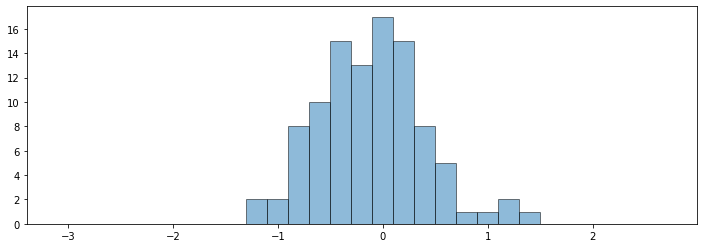

In [10]:
plt.figure(figsize=(12, 4))

fig = plt.bar(counts[1][:-1], counts[0], edgecolor='k',alpha=0.5, width=0.2)


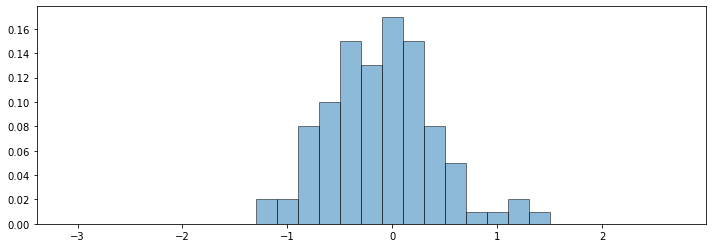

In [11]:
plt.figure(figsize=(12, 4))

fig = plt.bar(counts[1][:-1], counts[0]/sum(counts[0]), edgecolor='k',alpha=0.5, width=0.2)


(-3.0, 3.0)

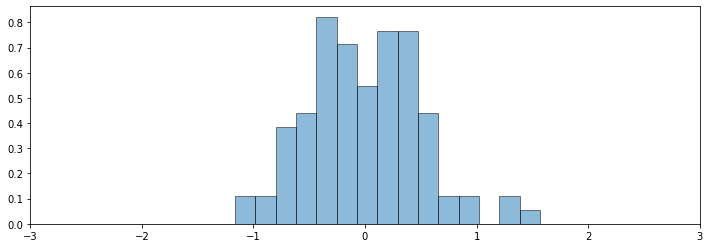

In [14]:
plt.figure(figsize=(12, 4))

fig = plt.hist(x, edgecolor='k',alpha=0.5, bins=15, density=True)
plt.xlim(-3,3)

### Computing the KDE of a Dataset?

__```Algorithm```__:
```
For each value along the `x` axis:
    For each data sample for which pdf(x) is not null
        y = sum of all such pdf
```       

* How many times will we compute the `pdf` function on a value `x` ?
* Alternatively, wow any times will we count the number of overlapping tophat kernels 

How can we speed up the `KDE`? 
  - Choose a kernel that is easier to compute
  - Using an appropriate data structure for finding nearest neighbors to a point $x$


In [21]:
x_values = np.arange(-3, 3, 0.1)

# compute the KDE
kde = sp.stats.gaussian_kde(x, bw_method=0.8)

# Estimate Kernel density for the support (x-axis)
x_densities = kde.evaluate(x_values)

print(x[0:10])
print("*" * 80)
print(x_densities[0:10])


[-0.04139014 -0.76911764 -0.69568426  0.47216512  1.27391967 -0.69051465
  0.04005509 -0.25252955  0.62381826  0.38332645]
********************************************************************************
[4.28768082e-07 1.31732311e-06 3.82173654e-06 1.04768869e-05
 2.71623861e-05 6.66642711e-05 1.55061745e-04 3.42275577e-04
 7.18057145e-04 1.43410923e-03]


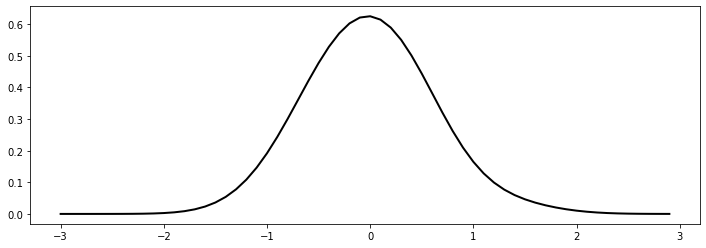

In [22]:
fig = plt.figure(figsize=(12,4))
plt.plot(x_values, x_densities, lw=2, color='black')

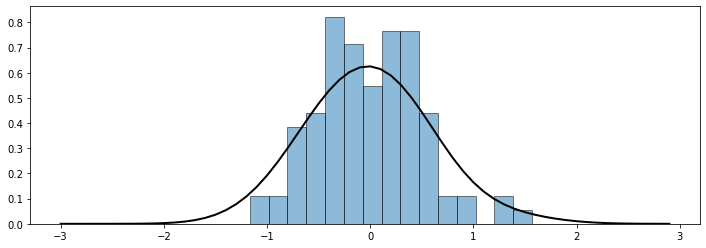

In [25]:
fig = plt.figure(figsize=(12,4))
plt.plot(x_values, x_densities, lw=2, color='black')
fig = plt.hist(x, edgecolor='k',alpha=0.5, bins=15, density=True)

In [26]:
x_mean, x_scale =  0, 0.5
y_mean, y_scale =  9, 1

In [27]:
x_data = np.random.normal(x_mean, x_scale, 100)
y_data = np.random.normal(y_mean, y_scale, 100)
print("The first 10 samples from the __first__ gaussian are:\n %s \n" % x_data[0:10])
print("The first 10 samples from the __second__ gaussian are:\n %s \n" % y_data[0:10])

The first 10 samples from the __first__ gaussian are:
 [-0.14366089 -1.08040927 -0.25691509 -0.65927997  0.15899949  0.0247911
  0.27728173  0.12940582 -0.4305582   0.66339007] 

The first 10 samples from the __second__ gaussian are:
 [ 8.63366269  8.85813812  9.33475874  8.90429236  9.84950051  9.75013408
  9.49683     8.40701103  9.21260402 10.8335024 ] 



In [28]:
# np.array([1,2,3]) +  np.array([1,2,3]) = np.array([2,4,6])
# np.array([1,2,3]) +  5 =>  np.array([1,2,3]) + np.array([5,5,5]) 
# = np.array([6,7,8])


SyntaxError: invalid syntax (1750315684.py, line 2)

In [30]:
all_data = np.concatenate([x_data, y_data]) # list_1 + list_2  
print(len(all_data))

200


In [31]:
np.arange(-3, 15, 0.5)

array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
        2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,
        8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5, 13. ,
       13.5, 14. , 14.5])

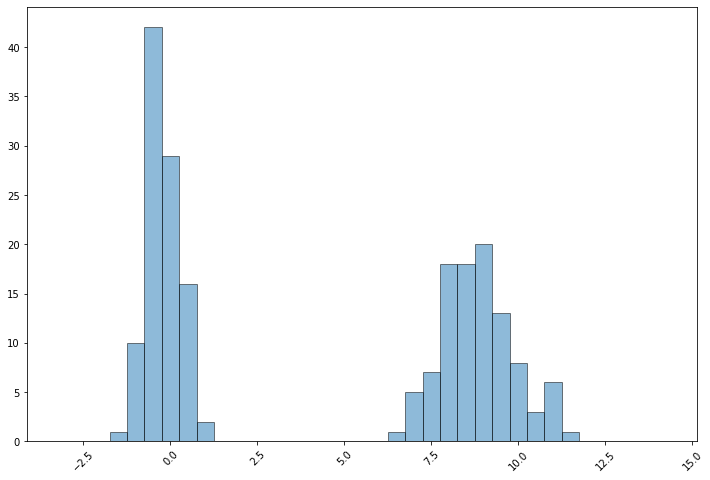

In [89]:

counts  = np.histogram(all_data, bins=np.arange(-3,15, 0.5))

plt.figure(figsize=(12, 8))
fig = plt.bar(counts[1][:-1], counts[0], alpha=.5, edgecolor="k", width=0.5)
_ = plt.xticks(rotation=45)



In [32]:
x_values = np.arange(-10, 20, 0.25)

# compute the KDE
kde = sp.stats.gaussian_kde(all_data, bw_method=0.16)

# Estimate Kernel density for the support (x-axis)
densities = kde.evaluate(x_values)


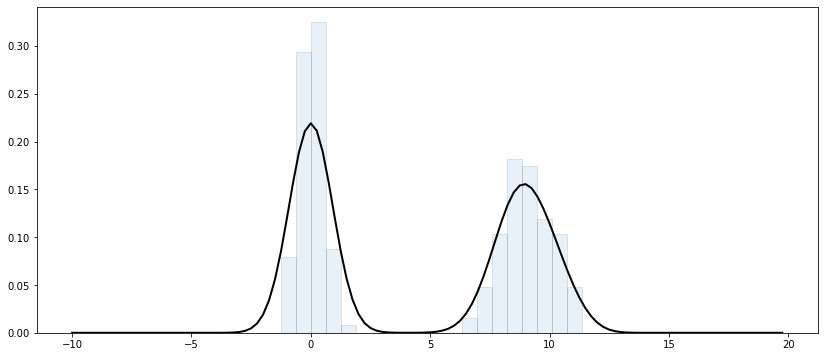

In [35]:
fig = plt.figure(figsize=(14,6))
plt.hist(all_data, bins=20, edgecolor="k", linewidth=1, density=True, alpha=0.1)
_ = plt.plot(x_values, densities, lw=2, color='black')

### Optimal Kernel Width

* Recall that the kernel is defined by its width
  * The often called `bandwidth` in programming libraries
  * This applies regardless of which kernel we choose (ex. tophat, exponential, Gaussian, etc.)

* How do we define the appropriate kernel width?
   * In the previous example, we set `bw` to `0.16`. Why did we choose this value?


### Optimal Kernel Width - Cont'd

* Recall that the scale determines the contributions of neighboring points
  * High width (large variance) accounts for distant neighbors
  * Small width (small variance) discounts the contribution of distant neighbors


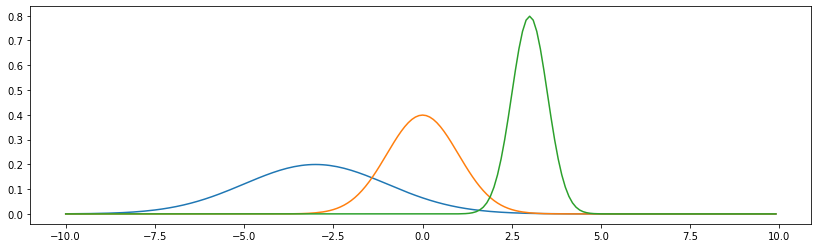

In [98]:
fig = plt.figure(figsize=(14,4))
kernel_1 = [sp.stats.norm.pdf(x, -3, 2) for x in np.arange(-10,10, 0.1)]
kernel_2 = [sp.stats.norm.pdf(x, 0, 1) for x in np.arange(-10,10, 0.1)]
kernel_3 = [sp.stats.norm.pdf(x, 3, 0.5) for x in np.arange(-10,10, 0.1)]

plt.plot(np.arange(-10,10, 0.1), kernel_1)
plt.plot(np.arange(-10,10, 0.1), kernel_2)
plt.plot(np.arange(-10,10, 0.1), kernel_3)

### Optimal Kernel Width - Cont'd

* It is essential to choose the most appropriate bandwidth as a value that is too small or too large is not useful. 

* If bandwidth is too small, the KDE is said to under-smoothed
  - Contributions to nearby points is small, which leads to a jagged curve
  
* This also referred to in machine learning as overfitting

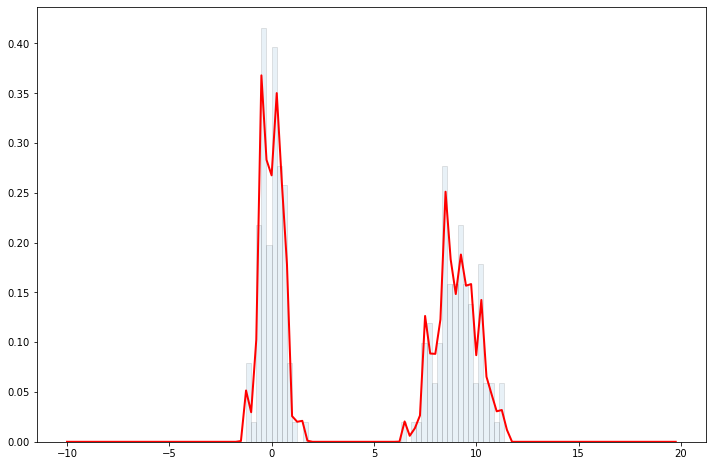

In [38]:
kde = sp.stats.gaussian_kde(all_data, bw_method=0.02)
densities = kde.evaluate(x_values)

fig = plt.figure(figsize=(12,8))
plt.hist(all_data, bins=50, density=True,  edgecolor="k", linewidth=1, alpha=0.1)
plt.plot(x_values, densities, lw=2, color='r')

### Optimal Kernel Width - Cont'd

* If the bandwidth is too large, the KDE is said to over-smooth

  * Contributions of nearby points is large, which leads to a flattened curve
  
* This also referred to in machine learning as underfitting 

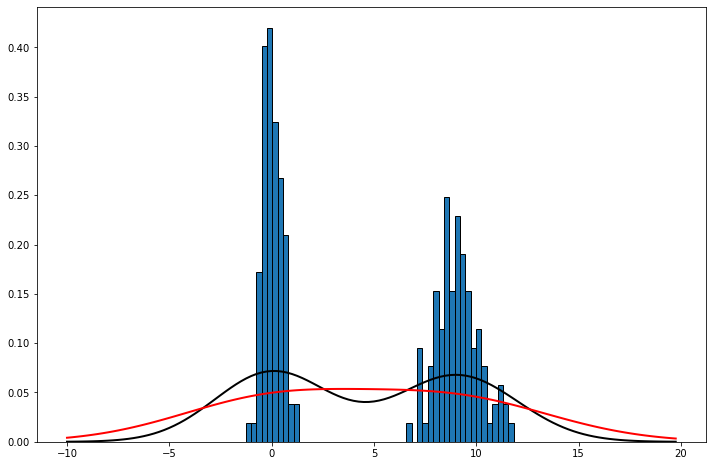

In [102]:
kde = sp.stats.gaussian_kde(all_data, bw_method=0.6)
densities = kde.evaluate(x_values)

kde = sp.stats.gaussian_kde(all_data, bw_method=1)
densities_2 = kde.evaluate(x_values)

plt.figure(figsize=(12,8))
plt.hist(all_data, bins=50, density=True, edgecolor="k", linewidth=1)
plt.plot(x_values, densities, lw=2, color='black')
plt.plot(x_values, densities_2, lw=2, color='red')

## How do you choose the correct value of the bandwidth?

Recall that we are trying to estimate a probability density for the population in the presence of a small dataset.

*  We want the bandwidth to be as close to the population pdf as possible

* We want a bandwidth that is narrow enough to retain all relevant details, but wide enough so that the resulting curve is not too wiggly
  * This is a recurring problem in data analysis; __Bias-Variance__ __Tradeoff__
  
  


### Illustrating the Bias-Variance Tradeoff

* To illustrate, we are going to geenrate multiple datasets from the same population
  - $X \sim \mathcal{N}(0, 1)$
  - $Y \sim \mathcal{N}(9, 1)$
  
* All the dataset come from the same population, so we expect their estimated probability densities to be as close as possible



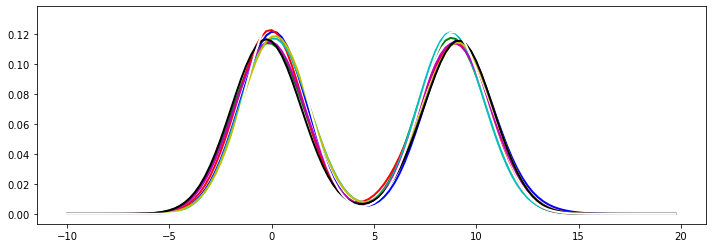

In [146]:
plt.figure(figsize=(12,4))
x_axis = np.arange(-3, 15, 0.1)
x_mean, x_scale =  0, 1
y_mean, y_scale =  9, 1

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for i in range(8):
    x_data = np.random.normal(x_mean, x_scale, 50)
    y_data = np.random.normal(y_mean, y_scale, 50)
    all_data = np.concatenate([x_data, y_data])
    kde = sp.stats.gaussian_kde(all_data, bw_method=0.3)
    densities = kde.evaluate(x_values)
    plt.plot(x_values, densities, lw=2, color=colors[i])
    


### Model Variance


* Variance in this context is the variability that is due to small fluctuations in the data 

 * Model focuses too much on the data and does not generalize on the data it hasn’t seen before.

* The model with a high variance pays close attention to the actual data and does not generalize to data it hasn't seen before. As a result, such models perform very well on data used ot learn the model (training) data but have high error rates on new (test) data.

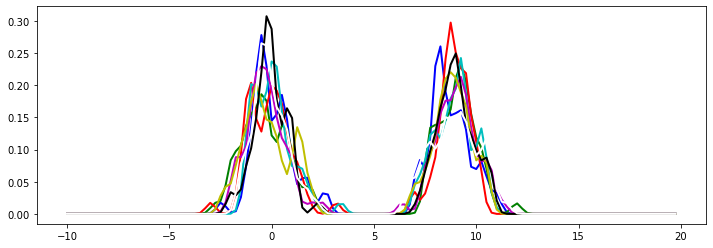

In [147]:

plt.figure(figsize=(12,4))
x_axis = np.arange(-3, 15, 0.1)
x_mean, x_scale =  0, 1
y_mean, y_scale =  9, 1

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for i in range(8):
    x_data = np.random.normal(x_mean, x_scale, 50)
    y_data = np.random.normal(y_mean, y_scale, 50)
    all_data = np.concatenate([x_data, y_data])
    kde = sp.stats.gaussian_kde(all_data, bw_method=0.05)
    densities = kde.evaluate(x_values)
    plt.plot(x_values, densities, lw=2, color=colors[i])
    


### Model Bias

* Bias in this context is the difference between the predicted and actual densities 
  * High-bias models oversimplify the model
  * Data contribution to the model is minimized. So, regardless of what the data says, the model will still look relatively the same.
 


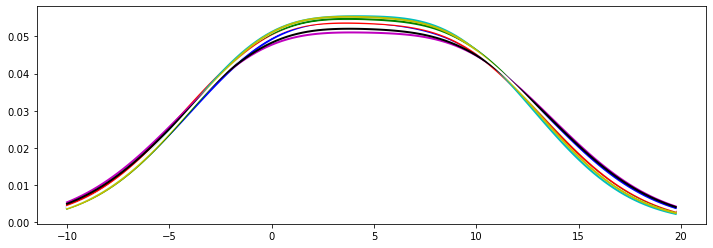

In [148]:
plt.figure(figsize=(12,4))
x_axis = np.arange(-3, 15, 0.1)
x_mean, x_scale =  0, 1
y_mean, y_scale =  9, 1


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for i in range(8):
    x_data = np.random.normal(x_mean, x_scale, 20)
    y_data = np.random.normal(y_mean, y_scale, 20)
    all_data = np.concatenate([x_data, y_data])
    kde = sp.stats.gaussian_kde(all_data, bw_method=1)
    densities = kde.evaluate(x_values)
    plt.plot(x_values, densities, lw=2, color=colors[i])
    


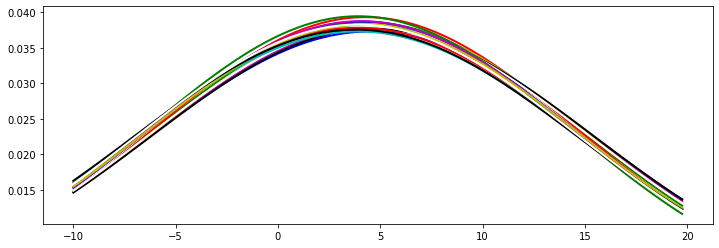

In [154]:
plt.figure(figsize=(12,4))
x_axis = np.arange(-3, 15, 0.1)
x_mean, x_scale =  0, 1
y_mean, y_scale =  9, 1


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for i in range(8):
    x_data = np.random.normal(x_mean, x_scale, 50)
    y_data = np.random.normal(y_mean, y_scale, 50)
    all_data = np.concatenate([x_data, y_data])
    kde = sp.stats.gaussian_kde(all_data, bw_method=2)
    densities = kde.evaluate(x_values)
    plt.plot(x_values, densities, lw=2, color=colors[i])
    

x_mean, x_scale =  -0.5, 1
y_mean, y_scale =  8.5, 1

for i in range(8):
    x_data = np.random.normal(x_mean, x_scale, 50)
    y_data = np.random.normal(y_mean, y_scale, 50)
    all_data = np.concatenate([x_data, y_data])
    kde = sp.stats.gaussian_kde(all_data, bw_method=2)
    densities = kde.evaluate(x_values)
    plt.plot(x_values, densities, lw=2, color=colors[i])

### Model Variance and Bias Revisited 

* Based on the above, we can conclude that:
  * Models with large variance, as the name implies, tend to generate a greater variance in their predictions for inferred values.
  * Models with large bias tend to generate greater *constant* biased model that do not fit the data well.

* What we want is to find the bandwidth that best fits our data
  * Yields a model with minimal bias and variance 
* We can assure that the bandwidth fits the data by leaving some data out and finding the bandwidth that maximizes our likelihood

* Interactive practical next session

### Selecting the Kernel Bandwidth - Theoretical

* Theoretical versus empirical solutions to tackle this problem

* Theoretical: optimal bandwidth is estimated using an equation (Ex. Silverman's rule, which is included in `scipy`'s gaussian_KDE)

$$
\large
h = (\frac{4\sigma^5}{3n})^{\frac{1}{5}}
$$

  - This is the typical approach in statistical analysis
  - Very fast: plug the number into an equation and you're done!


### Selecting the Kernel Bandwidth - Empirical

* An empirical approach that relies on the data. 
  * Choose a subset of the data from the KDE and see how well the KDE fits the remaining data 
  * Iterate until you find the best KDE.
    * This approach is called cross-validation. 

    * This approach is covered in detail in the machine learning modules



### Selecting the Kernel Bandwidth - Practical

* For KDE, I have found it sufficient to choose the `bandwidth` parameter as suggested by the default statistical method and to manually tweak the suggested value to obtain the most intuitive visualization of point distributions.

* Here, we can choose the `bw` which satisfies our prior knowledge of the data

  * We know the data comes from two distributions.



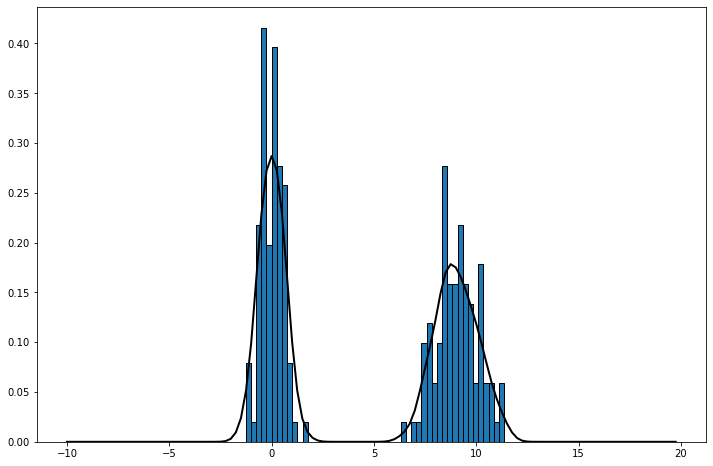

In [48]:
kde = sp.stats.gaussian_kde(all_data, bw_method=0.09)
densities = kde.evaluate(x_values)

plt.figure(figsize=(12,8))
plt.hist(all_data, bins=50, edgecolor="k", linewidth=1, density=True)
plt.plot(x_values, densities, lw=2, color='black')
